# Import library yang diperlukan

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from pathlib import Path

# Load dataset

In [2]:
mov_url='https://drive.google.com/uc?id=18ZGo-gedjmX3T7l722lpjin-FksU9Ihb'
rat_url='https://drive.google.com/uc?id=1nSAaKm7SAOqkuqvJA9_W8F_VvomRs89Y'
tag_url='https://drive.google.com/uc?id=1hohqLqlWaGWdVnM_nAlSb5zVT3-kEwOt'

movies = pd.read_csv(mov_url)
ratings = pd.read_csv(rat_url)
tags = pd.read_csv(tag_url)

print('Jumlah data unik movie : ', len(movies.movieId.unique()))
print('Jumlah data rating unik dari user : ', len(ratings.userId.unique()))
print('Jumlah data rating unik pada movie : ', len(ratings.movieId.unique()))
print('Jumlah data : ', len(tags.movieId.unique()))

Jumlah data unik movie :  9742
Jumlah data rating unik dari user :  610
Jumlah data rating unik pada movie :  9724
Jumlah data :  1572


Untuk jumlah data dengan nilai unik pada tiap kolom memiliki nilai yang berbeda seperti data movieId terdapat 9742 data mau itu pada file movies dan ratings, untuk data unik di user yang memberikan rating ada sebanyak 610 data dan user yang memberikan tag ada sebanyak 1572 data.

# Data Understanding

In [3]:
print("\nMovies Info:")
print(movies.info())


Movies Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  9742 non-null   int64 
 1   title    9742 non-null   object
 2   genres   9742 non-null   object
dtypes: int64(1), object(2)
memory usage: 228.5+ KB
None


In [4]:
print("\nRatings Info:")
print(ratings.info())
print("\nTags Info:")
print(tags.info())


Ratings Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100836 non-null  int64  
 1   movieId    100836 non-null  int64  
 2   rating     100836 non-null  float64
 3   timestamp  100836 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB
None

Tags Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3683 entries, 0 to 3682
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   userId     3683 non-null   int64 
 1   movieId    3683 non-null   int64 
 2   tag        3683 non-null   object
 3   timestamp  3683 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 115.2+ KB
None


In [8]:
print("\nMissing values movies:")
print(movies.isnull().sum())
print("\nMissing values ratings:")
print(ratings.isnull().sum())
print("\nMissing values tags:")
print(tags.isnull().sum())


Missing values movies:
movieId    0
title      0
genres     0
dtype: int64

Missing values ratings:
userId       0
movieId      0
rating       0
timestamp    0
dtype: int64

Missing values tags:
userId       0
movieId      0
tag          0
timestamp    0
dtype: int64


In [12]:
print("Duplikat movies:", movies.duplicated().sum())
print("Duplikat ratings:", ratings.duplicated().sum())
print("Duplikat tags:", tags.duplicated().sum())

Duplikat movies: 0
Duplikat ratings: 0
Duplikat tags: 0


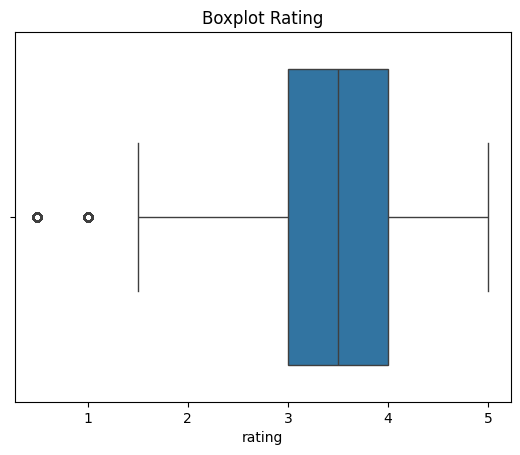

In [15]:
sns.boxplot(x=ratings['rating'])
plt.title("Boxplot Rating")
plt.show()

In [16]:
ratings.describe()

,userId,movieId,rating,timestamp
count,100836.000000,100836.000000,100836.000000,1.008360e+05
mean,326.127564,19435.295718,3.501557,1.205946e+09
std,182.618491,35530.987199,1.042529,2.162610e+08
min,1.000000,1.000000,0.500000,8.281246e+08
25%,177.000000,1199.000000,3.000000,1.019124e+09
50%,325.000000,2991.000000,3.500000,1.186087e+09
75%,477.000000,8122.000000,4.000000,1.435994e+09
max,610.000000,193609.000000,5.000000,1.537799e+09


In [ ]:
print("\nMovies Head:")
movies.head()


=== Univariate Analysis ===

Movies Head:


,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [6]:
print("\nRatings Head:")
ratings.head()


Ratings Head:


,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [7]:
print("\nTags Head:")
tags.head()


Tags Head:


,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992
3,2,89774,Boxing story,1445715207
4,2,89774,MMA,1445715200


**Insight**:

1. File ```movies.csv```, terdiri dari 9742 data dan 3 kolom dengan beberapa kolom sebagai berikut. (movies: daftar film yang tersedia)
    - movieId: id unik yang ada pada tiap film dengan tipe data integer.
    - title: Judul dari film-film yang tersedia dengan tipe data object.
    - genres: kategori yanga ada pada tiap film dengan tipe data object.
2. File ```ratings.csv```, terdiri dari 101 ribu data dan 4 kolom berbeda dengan variabel berikut. (ratings: penilaian dari pengguna)
    - userId: id unik yang dimiliki para penonton dengan tipe data integer.
    - movieId: id unik yang ada pada tiap film dengan tipe data integer.
    - rating: penilaian yang diberikan oleh penonton ke film yang mereka lihat dengan tipe data float.
    - timestamp: tanda waktu yang menandai kapan suatu peristiwa terjadi dengan tipe data integer.
3. File ```tags.csv```, terdiri dari 3683 data dan 4 kolom dengan variabel berikut. (tags: kata kunci untuk film)
    - userId: id unik yang dimiliki para penonton dengan tipe data integer.
    - movieId: id unik yang ada pada tiap film dengan tipe data integer.
    - tag: daftar kata kunci untuk film dengan tipe data object.
    - timestamp: tanda waktu yang menandai kapan suatu peristiwa terjadi dengan tipe data integer.
4. Tidak ditemukan adanya missing value pada ketiga data.
5. Tidak ada data yang terduplikat pada ketiga data.
6. Dalam mengecek dari boxplot dan .describe() tidak ditemukan data yang aneh.

# Data Preprocessing

In [8]:
# Menggabungkan genre dan tag untuk fitur content-based
movie_tags = tags.groupby('movieId')['tag'].apply(lambda x: '|'.join(x)).reset_index()
movies = pd.merge(movies, movie_tags, on='movieId', how='left')

Tahap ini bertujuan untuk menggabungkan semua ```tag``` untuk setiap film menjadi satu string yang dipisahkan oleh "|" dan digabungkan ke dalam dataframe movies berdasarkan ```movieId```.

In [9]:
movies.head()

,movieId,title,genres,tag
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,pixar|pixar|fun
1,2,Jumanji (1995),Adventure|Children|Fantasy,fantasy|magic board game|Robin Williams|game
2,3,Grumpier Old Men (1995),Comedy|Romance,moldy|old
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,NaN
4,5,Father of the Bride Part II (1995),Comedy,pregnancy|remake


In [10]:
# Membuat kolom baru tags
movies['tags'] = movies['tag'].fillna('') + ' ' + movies['genres'].str.replace('|', ' ')

Membuat kolom baru yang bertujuan menyatukan antara tag dengan genre pada film.

In [11]:
movies.head()

,movieId,title,genres,tag,tags
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,pixar|pixar|fun,pixar|pixar|fun Adventure Animation Children C...
1,2,Jumanji (1995),Adventure|Children|Fantasy,fantasy|magic board game|Robin Williams|game,fantasy|magic board game|Robin Williams|game A...
2,3,Grumpier Old Men (1995),Comedy|Romance,moldy|old,moldy|old Comedy Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,NaN,Comedy Drama Romance
4,5,Father of the Bride Part II (1995),Comedy,pregnancy|remake,pregnancy|remake Comedy


In [12]:
# Membersihkan data
movies['tags'] = movies['tags'].str.strip()
movies['tags'] = movies['tags'].fillna('')

Data akan dibersihkan dengan menghapus spasi berlebih di awal/akhir string kemudian mengisi nilai kosong (NaN) dengan string kosong agar tidak error saat vektorisasi.

In [13]:
movies.head()

,movieId,title,genres,tag,tags
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,pixar|pixar|fun,pixar|pixar|fun Adventure Animation Children C...
1,2,Jumanji (1995),Adventure|Children|Fantasy,fantasy|magic board game|Robin Williams|game,fantasy|magic board game|Robin Williams|game A...
2,3,Grumpier Old Men (1995),Comedy|Romance,moldy|old,moldy|old Comedy Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,NaN,Comedy Drama Romance
4,5,Father of the Bride Part II (1995),Comedy,pregnancy|remake,pregnancy|remake Comedy


In [14]:
# Data Preparation untuk Content-Based
data = movies[['movieId', 'title', 'tags']]
data = data.rename(columns={'movieId': 'id', 'title': 'movie_title'})

Pada variabel ```data``` akan digunakan sebagai dataframe yang nantinya dibuat dalam permodelan Content-Based Filtering.

In [15]:
data.head()

,id,movie_title,tags
0,1,Toy Story (1995),pixar|pixar|fun Adventure Animation Children C...
1,2,Jumanji (1995),fantasy|magic board game|Robin Williams|game A...
2,3,Grumpier Old Men (1995),moldy|old Comedy Romance
3,4,Waiting to Exhale (1995),Comedy Drama Romance
4,5,Father of the Bride Part II (1995),pregnancy|remake Comedy


# Model Development: Content-Based Filtering

In [16]:
# TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer(analyzer='word', ngram_range=(1, 2), min_df=1, stop_words='english')
tfidf_matrix = tfidf_vectorizer.fit_transform(data['tags'])

Mengubah teks pada kolom tags menjadi vektor numerik dengan menggunakan TF-IDF.

In [17]:
# Cosine Similarity
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

# Membuat dataframe similarity
indices = pd.Series(data.index, index=data['movie_title']).drop_duplicates()

 Dilakukan cosine similarity untuk melihat kemiripan antar vektor film yang mana semakin dekat maka akan dikatakan mirip. Kemudian dibuat index dengan code di bawah.

In [18]:
# Fungsi rekomendasi
def content_recommendations(title, cosine_sim=cosine_sim, df=data, k=5):
    idx = indices[title]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:k+1]
    movie_indices = [i[0] for i in sim_scores]
    return df.iloc[movie_indices][['movie_title', 'tags']]

Fungsi ini digunankan untuk mencari hasil rekomendasi, dengan mencari nama yang akan diubah ke dalam mapping dari indices. Lalu data akan mencari kemiripan dengan cosine_sim yang selanjutnya akan disusun 5 data yang sama sesuai dengan nilai k.

In [19]:
data[data.movie_title.eq('Toy Story (1995)')]

,id,movie_title,tags
0,1,Toy Story (1995),pixar|pixar|fun Adventure Animation Children C...


Data yang diuji yaitu Toy Story dengan memperlihatkan tags yang didapat seperti Adventure, Animation, Children.

In [20]:
# Contoh rekomendasi
print("\nRekomendasi untuk 'Toy Story (1995)':")
content_recommendations('Toy Story (1995)')


Rekomendasi untuk 'Toy Story (1995)':


,movie_title,tags
1757,"Bug's Life, A (1998)",Pixar Adventure Animation Children Comedy
1706,Antz (1998),Adventure Animation Children Comedy Fantasy
2809,"Adventures of Rocky and Bullwinkle, The (2000)",Adventure Animation Children Comedy Fantasy
3000,"Emperor's New Groove, The (2000)",Adventure Animation Children Comedy Fantasy
3568,"Monsters, Inc. (2001)",Adventure Animation Children Comedy Fantasy


Didapatkan 5 hasil dengan tags yang mirip dengan Toy Story (1995). Kelima film ini menjadi rekomendasi yang mirip dan akan direkomendasikan.

# Model Development: Collaborative Filtering

In [21]:
# Persiapan data
user_ids = ratings['userId'].unique().tolist()
movie_ids = ratings['movieId'].unique().tolist()

Mendapatkan daftar dengan Id yang unik dari user dan film untuk digunakan dalam basis encoding.

In [22]:
# Encoding IDs
user_to_user_encoded = {x: i for i, x in enumerate(user_ids)}
user_encoded_to_user = {i: x for i, x in enumerate(user_ids)}
movie_to_movie_encoded = {x: i for i, x in enumerate(movie_ids)}
movie_encoded_to_movie = {i: x for i, x in enumerate(movie_ids)}

Membuat peta encoding dari userId dan movieId ke integer untuk ke TensorFlow embedding layer.

In [23]:
# Mapping ke dataframe
ratings['user'] = ratings['userId'].map(user_to_user_encoded)
ratings['movie'] = ratings['movieId'].map(movie_to_movie_encoded)

Menambahkan kolom user dan movie ke dalam ratings.

In [24]:
# Normalisasi rating
min_rating = min(ratings['rating'])
max_rating = max(ratings['rating'])
ratings['rating'] = ratings['rating'].apply(lambda x: (x - min_rating) / (max_rating - min_rating))

Menyesuaikan nilai rating agar berada di antara 0-1, karena model menggunakan sigmoid dan loss BinaryCrossentropy(), yang mengharuskan label dalam range tersebut.

In [25]:
# Split data
x = ratings[['user', 'movie']].values
y = ratings['rating'].values
train_indices = int(0.8 * len(x))
x_train, x_val, y_train, y_val = (
    x[:train_indices],
    x[train_indices:],
    y[:train_indices],
    y[train_indices:]
)

Menyusun input x dan y, kemudian mengatur split data untuk training dengan perbandingan 80:20.

## Model Neural Network

In [26]:
class RecommenderNet(keras.Model):
    def __init__(self, num_users, num_movies, embedding_size, **kwargs):
        super(RecommenderNet, self).__init__(**kwargs)
        self.num_users = num_users
        self.num_movies = num_movies
        self.embedding_size = embedding_size
        self.user_embedding = layers.Embedding(
            num_users,
            embedding_size,
            embeddings_initializer='he_normal',
            embeddings_regularizer=keras.regularizers.l2(1e-6)
        )
        self.user_bias = layers.Embedding(num_users, 1)
        self.movie_embedding = layers.Embedding(
            num_movies,
            embedding_size,
            embeddings_initializer='he_normal',
            embeddings_regularizer=keras.regularizers.l2(1e-6)
        )
        self.movie_bias = layers.Embedding(num_movies, 1)

    def call(self, inputs):
        user_vector = self.user_embedding(inputs[:, 0])
        user_bias = self.user_bias(inputs[:, 0])
        movie_vector = self.movie_embedding(inputs[:, 1])
        movie_bias = self.movie_bias(inputs[:, 1])
        dot_user_movie = tf.tensordot(user_vector, movie_vector, 2)
        x = dot_user_movie + user_bias + movie_bias
        return tf.nn.sigmoid(x)

RecommenderNet ini membuat model rekomendasi berbasis Collaborative Filtering yang menggunakan pendekatan matrix factorization dengan embedding layer di TensorFlow/Keras. Model ini mempelajari representasi (embedding) dari User dan Movie, kemudian akan menghitung prediksi rating berdasarkan dot product ditambah bias.

In [27]:
# Inisialisasi model
num_users = len(user_to_user_encoded)
num_movies = len(movie_encoded_to_movie)
model = RecommenderNet(num_users, num_movies, 50)

# Compile model
model.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=[tf.keras.metrics.RootMeanSquaredError()]
)

Langkah ini menyiapkan model agar siap dilatih pada data dari user dan movie untuk ke rating. Kemudian, model ini digunakan ke .fit() dengan data training dan validasi.

# Evaluasi

In [ ]:
# Melakukan training model
history = model.fit(
    x=x_train,
    y=y_train,
    batch_size=64,
    epochs=20,
    validation_data=(x_val, y_val)
)

Epoch 1/20
1261/1261 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - loss: 0.6560 - root_mean_squared_error: 0.2520 - val_loss: 0.6808 - val_root_mean_squared_error: 0.2682
Epoch 2/20
1261/1261 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - loss: 0.6149 - root_mean_squared_error: 0.2120 - val_loss: 0.6750 - val_root_mean_squared_error: 0.2626
Epoch 3/20
1261/1261 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - loss: 0.6080 - root_mean_squared_error: 0.2051 - val_loss: 0.6704 - val_root_mean_squared_error: 0.2581
Epoch 4/20
1261/1261 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - loss: 0.6064 - root_mean_squared_error: 0.2015 - val_loss: 0.6672 - val_root_mean_squared_error: 0.2549
Epoch 5/20
1261/1261 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - loss: 0.6051 - root_mean_squared_error: 0.2019 - val_loss: 0.6649 - val_root_mean_squared_error: 0.2525
Epoch 6/20
1261/1261 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - loss: 0.6052 - root_mean_squared_error: 0.2012 - val_loss: 0.6630 - val_root_mean_squared_error: 0.2505
Epoch 7/20
1261/1261 ━━━━━━━━━━━━━━━━━━

Proses training dari model terlihat terus membaik dengan hasil akhir RMSE 0,1957 dan validation di 0,2409.

In [ ]:
# Visualisasi metrik
plt.plot(history.history['root_mean_squared_error'])
plt.plot(history.history['val_root_mean_squared_error'])
plt.title('Model Metrics')
plt.ylabel('RMSE')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

Dilihat dari grafik  selama training terlihat bahwa nilai RMSE pada training dan validasi menurun secara konsisten, walaupun ada gap yang membuat selisih kedua nilai, namun gap ini masih dalam batas wajar.

In [ ]:
# Mendapatkan rekomendasi
def get_recommendations(user_id, k=10):
    movies_watched = ratings[ratings['userId'] == user_id]
    movies_not_watched = movies[~movies['movieId'].isin(movies_watched['movieId'].values)]
    movies_not_watched = list(set(movies_not_watched['movieId']).intersection(set(movie_to_movie_encoded.keys())))
    movies_not_watched = [[movie_to_movie_encoded.get(x)] for x in movies_not_watched]
    user_encoder = user_to_user_encoded.get(user_id)
    user_movie_array = np.hstack(([[user_encoder]] * len(movies_not_watched), movies_not_watched))
    ratings_pred = model.predict(user_movie_array).flatten()
    top_ratings_indices = ratings_pred.argsort()[-k:][::-1]
    recommended_movie_ids = [movie_encoded_to_movie.get(movies_not_watched[x][0]) for x in top_ratings_indices]
        
    print(f"Rekomendasi untuk user {user_id}:")
    print("===="*10)
    print("Film dengan rating tinggi dari user:")
    top_movies_user = movies_watched.sort_values(by='rating', ascending=False).head(5).merge(movies, left_on='movieId', right_on='movieId')
    for row in top_movies_user.itertuples():
        print(row.title, "-", row.genres)
    
    print("===="*10)
    print("Top 10 rekomendasi film:")
    recommended_movies = movies[movies['movieId'].isin(recommended_movie_ids)]
    for row in recommended_movies.itertuples():
        print(row.title, "-", row.genres)

get_recommendations akan mencarikan fungsi untuk rekomendasi dari rating, dengan cara mencari riwayat rating yang diberikan oleh user. Dengan mencari sesuai id dari user dan kemudian akan dihasilkan 10 rekomendasi sesuai dengan nilai k yang ada.

In [31]:
# Rekomendasi untuk user 1
get_recommendations(1)

297/297 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Rekomendasi untuk user 1:
Film dengan rating tinggi dari user:
M*A*S*H (a.k.a. MASH) (1970) - Comedy|Drama|War
Excalibur (1981) - Adventure|Fantasy
Indiana Jones and the Last Crusade (1989) - Action|Adventure
Pink Floyd: The Wall (1982) - Drama|Musical
From Russia with Love (1963) - Action|Adventure|Thriller
Top 10 rekomendasi film:
Shawshank Redemption, The (1994) - Crime|Drama
Dr. Strangelove or: How I Learned to Stop Worrying and Love the Bomb (1964) - Comedy|War
Philadelphia Story, The (1940) - Comedy|Drama|Romance
Rear Window (1954) - Mystery|Thriller
North by Northwest (1959) - Action|Adventure|Mystery|Romance|Thriller
Casablanca (1942) - Drama|Romance
Ran (1985) - Drama|War
Trial, The (Procès, Le) (1962) - Drama
The Artist (2011) - Comedy|Drama|Romance
Three Billboards Outside Ebbing, Missouri (2017) - Crime|Drama
